In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 

from datetime import datetime
from IPython.display import IFrame

import warnings 
warnings.filterwarnings("ignore")

In [2]:
cd data

C:\Users\zaqxs\ML_project\data


In [3]:
# read data
rating_df= pd.read_csv("../data/ml-100k/u.data", sep="\t", names=["user_id", "item_id", "rating", "timestamp"])

item_df = pd.read_csv("../data/ml-100k/u.item", sep="|",encoding="latin-1", 
                      names=["movie_id", "movie_title", "release_date", "video_release_date",
                             "imbd_url", "unknown", "action", "adventure", "animation",
                             "childrens", "comedy", "crime", "documentary", "drama", "fantasy", 
                             "film_noir", "horror", "musical", "mystery", "romance", 
                             "sci-fi", "thriller", "war", "western"])

user_df = pd.read_csv("../data/ml-100k/u.user", sep="|", encoding="latin-1", names=["user_id", "age", "gender",
                                                                            "occupation", "zip_code"])


In [4]:
# peak at ratings_df
print(rating_df.info())
rating_df.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user_id      100000 non-null int64
item_id      100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB
None


,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
# checking unique users
print(f"# of Unique Users: {rating_df['user_id'].nunique()}")

# checking number of items
print(f"# of items: {rating_df['item_id'].nunique()}")

# of Unique Users: 943
# of items: 1682


In [6]:
# convert timestamp column to time stamp 
rating_df["timestamp"] = rating_df.timestamp.apply(lambda x: datetime.fromtimestamp(x / 1e3))

# check if change has been applied 
print(rating_df.info())
rating_df.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user_id      100000 non-null int64
item_id      100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 3.1 MB
None


,user_id,item_id,rating,timestamp
0,196,242,3,1970-01-11 13:47:30.949
1,186,302,3,1970-01-11 16:41:57.742
2,22,377,1,1970-01-11 13:08:07.116
3,244,51,2,1970-01-11 13:36:46.923
4,166,346,1,1970-01-11 15:13:17.596


In [7]:
# peak at items_df 
print(item_df.info())
item_df.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
movie_id              1682 non-null int64
movie_title           1682 non-null object
release_date          1681 non-null object
video_release_date    0 non-null float64
imbd_url              1679 non-null object
unknown               1682 non-null int64
action                1682 non-null int64
adventure             1682 non-null int64
animation             1682 non-null int64
childrens             1682 non-null int64
comedy                1682 non-null int64
crime                 1682 non-null int64
documentary           1682 non-null int64
drama                 1682 non-null int64
fantasy               1682 non-null int64
film_noir             1682 non-null int64
horror                1682 non-null int64
musical               1682 non-null int64
mystery               1682 non-null int64
romance               1682 non-null int64
sci-fi                1682 non-null int64
thriller 

,movie_id,movie_title,release_date,video_release_date,imbd_url,unknown,action,adventure,animation,childrens,...,fantasy,film_noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
# drop empty column 
item_df.drop("video_release_date", axis=1, inplace= True)

# convert non-null values to datetime in release_date
item_df["release_date"] = item_df[item_df.release_date.notna()]["release_date"].apply(lambda x: datetime.strptime(x, "%d-%b-%Y"))

# check if change is applied
print(item_df.info(), item_df.shape)
item_df.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 23 columns):
movie_id        1682 non-null int64
movie_title     1682 non-null object
release_date    1681 non-null datetime64[ns]
imbd_url        1679 non-null object
unknown         1682 non-null int64
action          1682 non-null int64
adventure       1682 non-null int64
animation       1682 non-null int64
childrens       1682 non-null int64
comedy          1682 non-null int64
crime           1682 non-null int64
documentary     1682 non-null int64
drama           1682 non-null int64
fantasy         1682 non-null int64
film_noir       1682 non-null int64
horror          1682 non-null int64
musical         1682 non-null int64
mystery         1682 non-null int64
romance         1682 non-null int64
sci-fi          1682 non-null int64
thriller        1682 non-null int64
war             1682 non-null int64
western         1682 non-null int64
dtypes: datetime64[ns](1), int64(20), object(2)
memory

,movie_id,movie_title,release_date,imbd_url,unknown,action,adventure,animation,childrens,comedy,...,fantasy,film_noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
0,1,Toy Story (1995),1995-01-01,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1995-01-01,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),1995-01-01,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1995-01-01,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),1995-01-01,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
# viewing random imbd_urls
IFrame("https://www.imdb.com", width=800, height=400)

Now let's look at the user data... 

In [10]:
# peak at user data
print(user_df.info())
user_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user_id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 36.9+ KB
None


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [11]:
# store full dataframe 
full_df = pd.merge(user_df, rating_df, how="left", on="user_id")
full_df = pd.merge(full_df, item_df, how="left", right_on="movie_id", left_on="item_id")
full_df.head()

,user_id,age,gender,occupation,zip_code,item_id,rating,timestamp,movie_id,movie_title,...,fantasy,film_noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
0,1,24,M,technician,85711,61,4,1970-01-11 13:02:22.420,61,Three Colors: White (1994),...,0,0,0,0,0,0,0,0,0,0
1,1,24,M,technician,85711,189,3,1970-01-11 15:52:12.928,189,"Grand Day Out, A (1992)",...,0,0,0,0,0,0,0,0,0,0
2,1,24,M,technician,85711,33,4,1970-01-11 13:02:22.699,33,Desperado (1995),...,0,0,0,0,0,1,0,1,0,0
3,1,24,M,technician,85711,160,4,1970-01-11 12:04:32.547,160,Glengarry Glen Ross (1992),...,0,0,0,0,0,0,0,0,0,0
4,1,24,M,technician,85711,20,4,1970-01-11 15:30:31.883,20,Angels and Insects (1995),...,0,0,0,0,0,1,0,0,0,0


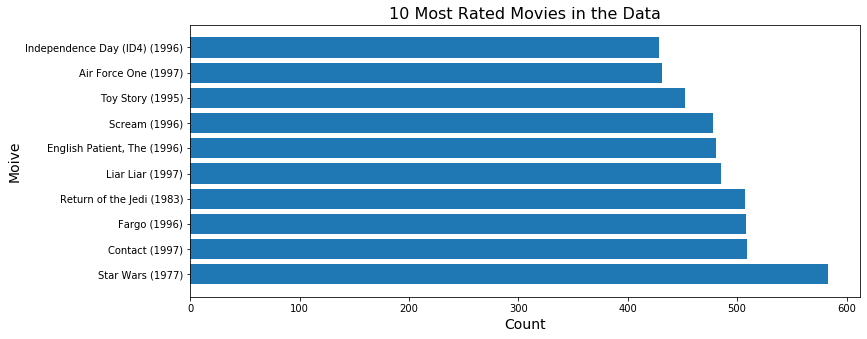

In [12]:
# return number of rows associated to each title
top_ten_movies = full_df.groupby("movie_title").size().sort_values(ascending=False)[:10]

# plot the counts
plt.figure(figsize=(12, 5))
plt.barh(y= top_ten_movies.index,
         width= top_ten_movies.values)
plt.title("10 Most Rated Movies in the Data", fontsize=16)
plt.ylabel("Moive", fontsize=14)
plt.xlabel("Count", fontsize=14)
plt.show()

In [13]:
genres= ["unknown", "action", "adventure", "animation", "childrens", "comedy", "crime",
         "documentary", "drama", "fantasy", "film_noir", "horror", "musical",
         "mystery", "romance", "sci-fi", "thriller", "war", "western"]

full_df[full_df.movie_title == "Star Wars (1977)"][genres].iloc[0].sort_values(ascending=False)

action         1
sci-fi         1
romance        1
adventure      1
war            1
western        0
documentary    0
animation      0
childrens      0
comedy         0
crime          0
fantasy        0
drama          0
film_noir      0
horror         0
musical        0
mystery        0
thriller       0
unknown        0
Name: 204, dtype: int64

In [14]:
# the least rated movies 
least_10_movies = full_df.groupby("movie_title").size().sort_values(ascending=False)[-10:]
least_10_movies

movie_title
Coldblooded (1995)                            1
MURDER and murder (1996)                      1
Big Bang Theory, The (1994)                   1
Mad Dog Time (1996)                           1
Mamma Roma (1962)                             1
Man from Down Under, The (1943)               1
Marlene Dietrich: Shadow and Light (1996)     1
Mat' i syn (1997)                             1
Mille bolle blu (1993)                        1
Á köldum klaka (Cold Fever) (1994)            1
dtype: int64

In [15]:
movies_rated = rating_df.groupby("user_id").size().sort_values(ascending=False)
print(f"Max movies rated by one user: {max(movies_rated)}\nMin movies rated by one user: {min(movies_rated)}")

Max movies rated by one user: 737
Min movies rated by one user: 20


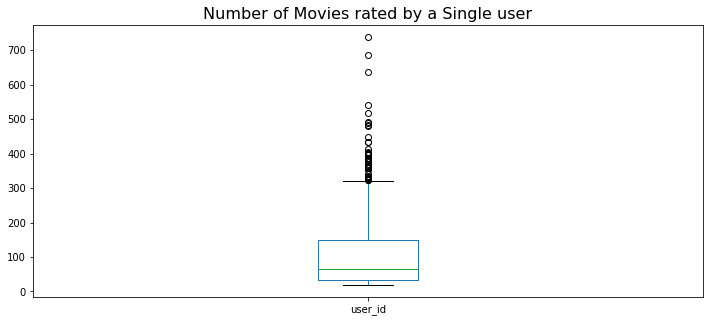

In [16]:
rating_df.user_id.value_counts().plot.box(figsize=(12, 5))
plt.title("Number of Movies rated by a Single user", fontsize=16)
plt.show()

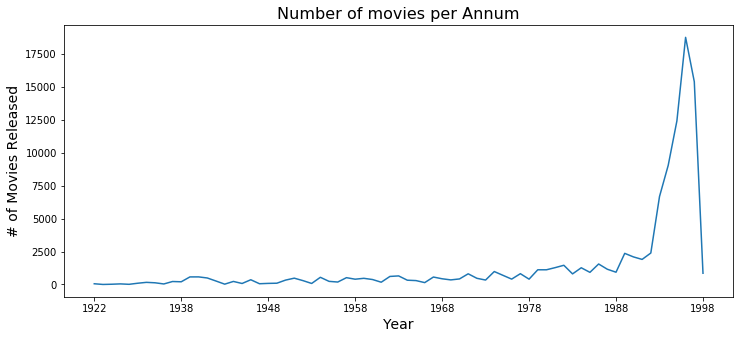

In [17]:
# create the year column from Movie title 
full_df["year"] = full_df["movie_title"].str.extract("\((\d{4})\)", expand=True)

# return number of rows by the year 
year_counts = full_df[["movie_title", "year"]].groupby("year").size()

fig, ax = plt.subplots(figsize=(12, 5)) 
ax.plot(year_counts.index, year_counts.values)
ax.xaxis.set_major_locator(plt.MaxNLocator(9)) # changes the number of xticks we see
plt.title("Number of movies per Annum", fontsize=16)
plt.xlabel("Year", fontsize= 14)
plt.ylabel("# of Movies Released", fontsize=14)
plt.show()

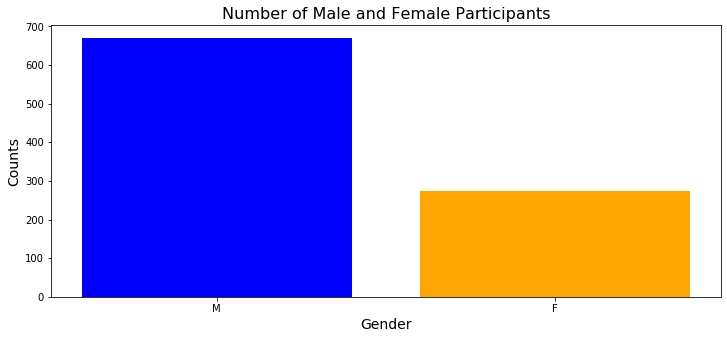

In [18]:
# count the number of male and female raters
gender_counts = user_df.gender.value_counts()

# plot the counts 
plt.figure(figsize=(12, 5))
plt.bar(x= gender_counts.index[0], height=gender_counts.values[0], color="blue")
plt.bar(x= gender_counts.index[1], height=gender_counts.values[1], color="orange")
plt.title("Number of Male and Female Participants", fontsize=16)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.show() 

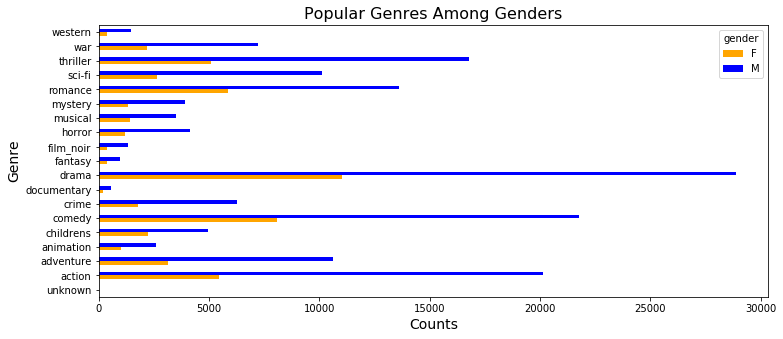

In [19]:
full_df[genres+["gender"]].groupby("gender").sum().T.plot(kind="barh", figsize=(12,5), color=["orange", "blue"])
plt.xlabel("Counts",fontsize=14)
plt.ylabel("Genre", fontsize=14)
plt.title("Popular Genres Among Genders", fontsize=16)
plt.show()

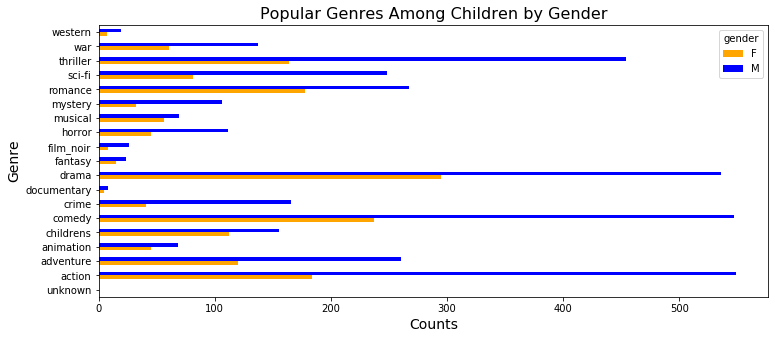

In [20]:
full_df[full_df["age"] < 18][genres + ["gender"]].groupby("gender").sum().T.plot(kind="barh", figsize=(12, 5), color=["orange", "blue"])
plt.xlabel("Counts",fontsize=14)
plt.ylabel("Genre", fontsize=14)
plt.title("Popular Genres Among Children by Gender", fontsize=16)
plt.show()

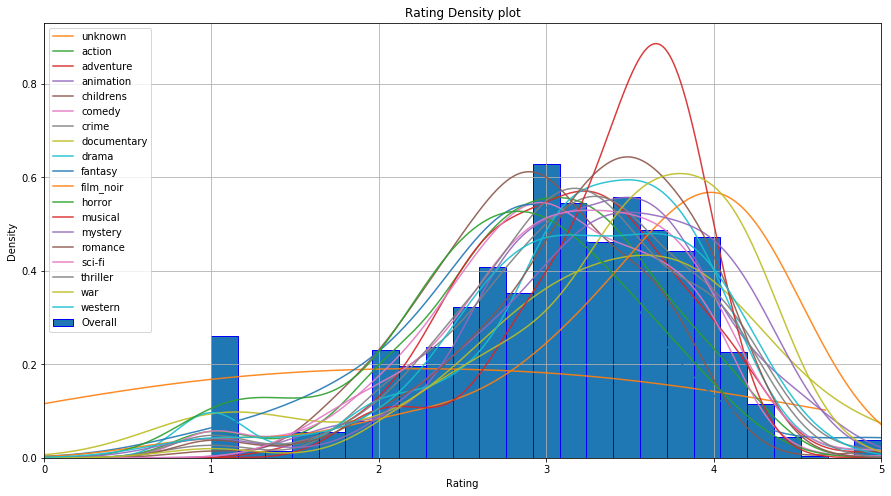

In [21]:
# https://github.com/HarilalOP/movielens-data-exploration/blob/master/src/main/code/exploratory_analysis.ipynb
df_temp = full_df[['movie_id','rating']].groupby('movie_id').mean()

# Histogram of all ratings
df_temp.hist(bins=25, grid=False, edgecolor='b', density=True, label ='Overall', figsize=(15,8))

# KDE plot per genre
for genre in genres:
    df_temp = full_df[full_df[genre]==True][['movie_id','rating']].groupby('movie_id').mean()
    df_temp.rating.plot(grid=True, alpha=0.9, kind='kde', label=genre)
plt.legend()
plt.xlim(0,5)
plt.xlabel('Rating')
plt.title('Rating Density plot')
plt.show()

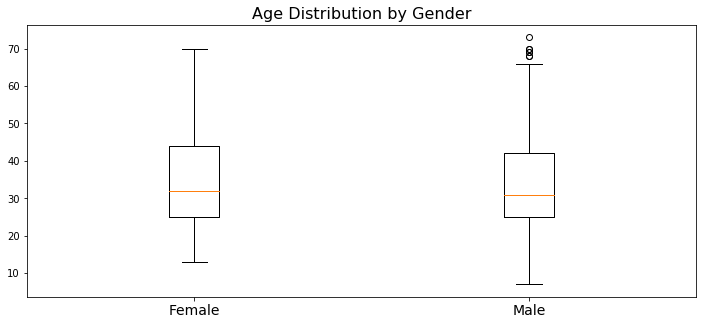

In [22]:
# creating new variable for ages of all males and females
female_age_dist = user_df[user_df["gender"] == "F"]["age"]
male_age_dist = user_df[user_df["gender"] == "M"]["age"]

# plotting boxplots 
plt.figure(figsize=(12,5))
plt.boxplot([female_age_dist, male_age_dist])
plt.xticks([1, 2], ["Female", "Male"], fontsize=14)
plt.title("Age Distribution by Gender", fontsize=16)

plt.show()

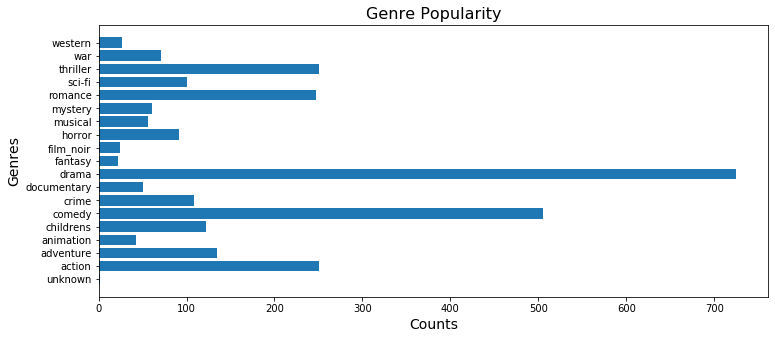

In [23]:
# get the genre names in the dataframe and their counts
label= item_df.loc[:, "unknown":].sum().index
label_counts= item_df.loc[:, "unknown":].sum().values

# plot a bar chart
plt.figure(figsize=(12, 5))
plt.barh(y= label, width= label_counts)
plt.title("Genre Popularity", fontsize=16)
plt.ylabel("Genres", fontsize=14)
plt.xlabel("Counts", fontsize=14)

plt.show()

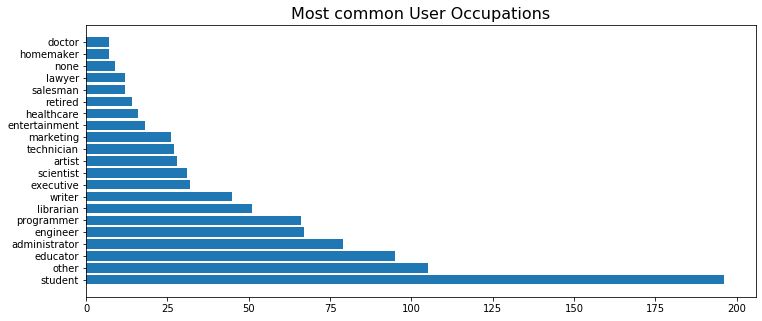

In [24]:
# creating the index and values variables for occupation
occ_label= user_df.occupation.value_counts().index
occ_label_counts = user_df.occupation.value_counts().values

# plot horizontal bar chart
plt.figure(figsize=(12,5))
plt.barh(y=occ_label, width=occ_label_counts)
plt.title("Most common User Occupations", fontsize=16)
plt.show()

In [25]:
# creating a empty df to store data
df_temp = pd.DataFrame(columns=["occupation", "avg_rating"])

# loop through all the occupations 
for idx, occ in enumerate(occ_label):
    df_temp.loc[idx, "occupation"] = occ 
    df_temp.loc[idx, "avg_rating"] = round(full_df[full_df["occupation"] == occ]["rating"].mean(), 2)

# sort from highest to lowest
df_temp = df_temp.sort_values("avg_rating", ascending=False).reset_index(drop=True)
df_temp 

,occupation,avg_rating
0,none,3.78
1,lawyer,3.74
2,doctor,3.69
3,educator,3.67
4,artist,3.65
5,administrator,3.64
6,scientist,3.61
7,salesman,3.58
8,programmer,3.57
9,librarian,3.56
